<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/05_One_Hot_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [1]:
# get utils/plot.py
!wget https://github.com/ML-Bioinfo-CEITEC/ECCB2021/blob/main/utils/plot.py

from tensorflow import keras as K
import tensorflow as tf
import numpy as np
import pandas as pd

--2021-07-12 13:41:20--  https://github.com/ML-Bioinfo-CEITEC/ECCB2021/blob/main/utils/plot.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘plot.py.4’

plot.py.4               [ <=>                ] 134.08K  --.-KB/s    in 0.006s  

2021-07-12 13:41:20 (21.2 MB/s) - ‘plot.py.4’ saved [137294]



## One-hot encoding

### One-hot description

In natural language processing, a one-hot vector is a 1 × N matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. One-hot encoding ensures that machine learning does not assume that higher numbers are more important. For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words: the value 'laughter' is not more important than 'laugh'.


One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.


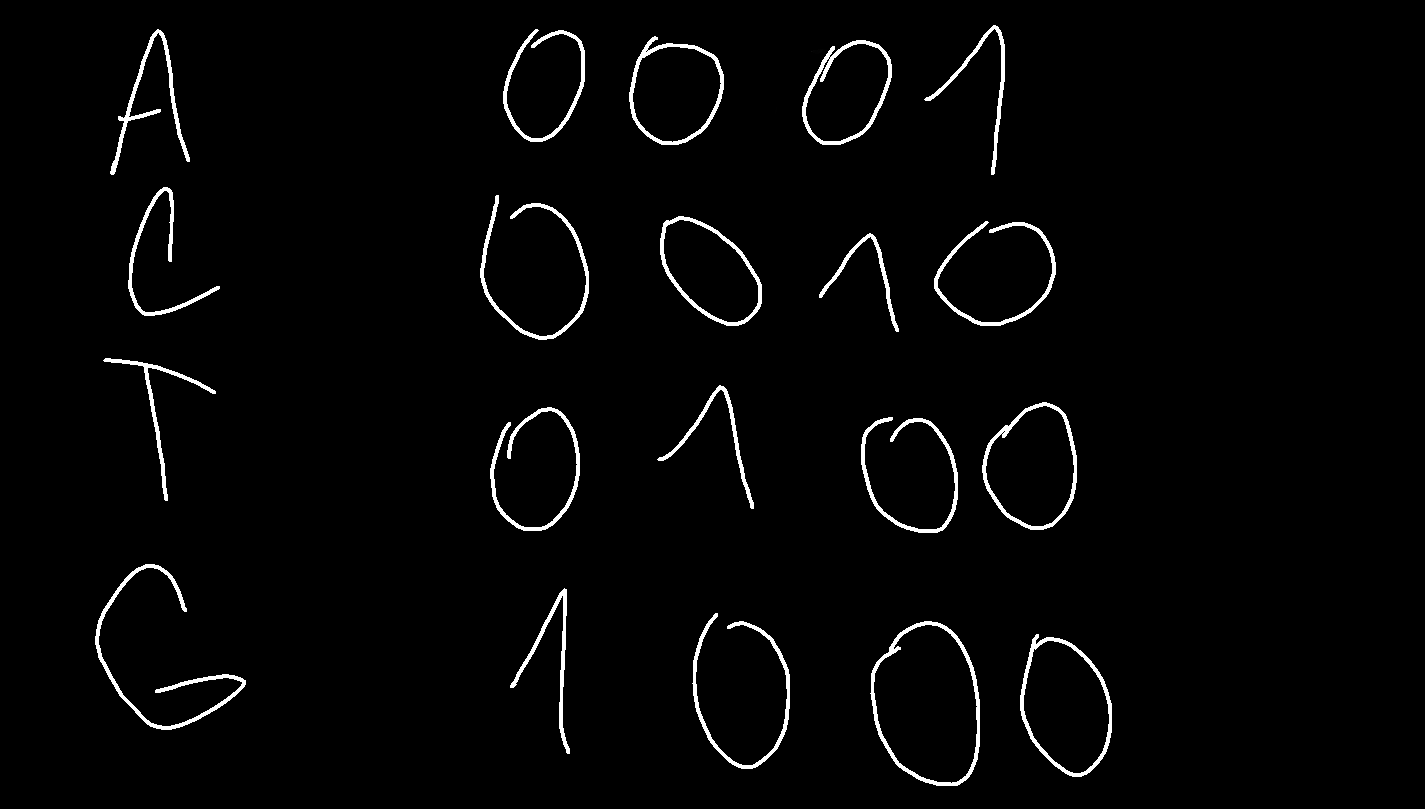

### One-hot code

In [2]:
# get test dataset
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt


--2021-07-12 13:41:23--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63000000 (60M) [text/plain]
Saving to: ‘train_set_1_1.txt.4’

train_set_1_1.txt.4 100%[===================>]  60.08M   122MB/s    in 0.5s    

2021-07-12 13:41:23 (122 MB/s) - ‘train_set_1_1.txt.4’ saved [63000000/63000000]



In [3]:
df_train = pd.read_csv("train_set_1_1.txt", sep='\t', names=['sequence', 'label'])

labels_train = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df_train['label']))))
dataset_train = df_train['sequence'].tolist()


nucleo_dic = {
    "A": 0,
    "C": 1,
    "T": 2,
    "G": 3,
    "N": 4,
}

dataset_ordinal_train = [[nucleo_dic[letter] for letter in sequence] for sequence in dataset_train]

example_sequence = 42
print(dataset_train[example_sequence])
print(dataset_ordinal_train[example_sequence])

CCGAGGTAAAAGTGCTGAAACCATGTGAATAAAATACAGGTGGGTTCCGCCAGCTTCGCTCCTGAACCTACCCGCGCTCGGGATCCAGAAGCTGCGCCGGGAGAGAGGGGCTCAGGCCTGGGCGGAGGGGACGGAGGTCAGACCGTGCGGAAAGTGACCCGGGCACCCCAGGGCGCCCAGGCCCCCAGGGAGCGCGGAAA
[1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 3, 1, 2, 3, 0, 0, 0, 1, 1, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 3, 3, 2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 1, 0, 3, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 1, 0, 3, 0, 0, 3, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 2, 1, 0, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 2, 1, 0, 3, 0, 1, 1, 3, 2, 3, 1, 3, 3, 0, 0, 0, 3, 2, 3, 0, 1, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 0, 0, 0]


In [4]:
dataset_onehot_train = tf.one_hot(dataset_ordinal_train, depth=5)

print("the length of the dataset", len(dataset_train), len(dataset_ordinal_train), len(dataset_onehot_train))

print("the length of a sequence in the dataset", len(dataset_train[example_sequence]), len(dataset_ordinal_train[example_sequence]), len(dataset_onehot_train[example_sequence]))

print("\n Let's check examples of how the ACTG characters got translated into one-hot: \n")
print("characters: ", dataset_train[example_sequence][0:3])
print("ordinal form: ", dataset_ordinal_train[example_sequence][0:3])
print("one-hot: ", dataset_onehot_train[example_sequence][0:3], "\n")

print("characters: ", dataset_train[example_sequence][80:85])
print("ordinal form: ", dataset_ordinal_train[example_sequence][80:85])
print("one-hot: ", dataset_onehot_train[example_sequence][80:85])

the length of the dataset 300000 300000 300000
the length of a sequence in the dataset 200 200 200

 Let's check examples of how the ACTG characters got translated into one-hot: 

characters:  CCG
ordinal form:  [1, 1, 3]
one-hot:  tf.Tensor(
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]], shape=(3, 5), dtype=float32) 

characters:  GGATC
ordinal form:  [3, 3, 0, 2, 1]
one-hot:  tf.Tensor(
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(5, 5), dtype=float32)


ToDo ??? bonus: 

!pip install tensorflow_io

import tensorflow_io as tfio

tfio.genome.sequences_to_onehot(dataset)

https://www.tensorflow.org/io/api_docs/python/tfio/genome/sequences_to_onehot